<a href="https://colab.research.google.com/github/Rogerio-mack/BIG_DATA_Analytics_Mineracao_e_Analise_de_Dados/blob/main/BIG_T2_Regressao_e_Classificacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<head>
  <meta name="author" content="Rogério de Oliveira">
  <meta institution="author" content="Universidade Presbiteriana Mackenzie">
</head>

<img src="http://meusite.mackenzie.br/rogerio/mackenzie_logo/UPM.2_horizontal_vermelho.jpg" width=300, align="right">
<!-- <h1 align=left><font size = 6, style="color:rgb(200,0,0)"> optional title </font></h1> -->


# **2. Regressão e Classificação: Regressão Linear e Logística**
---

Nesta trilha você vai aprender:

* Princípios básicos de Aprendizado Supervisionado com modelos de  Regressão e  Classificação
* Criar e aplicar modelos de Regressão Linear Simples e Múltipla em Python para predição de valores
* Criar e aplicar um modelo de Regressão Logística para predição de Classes de Dados 

Aqui você aprender dois modelos simples de aprendizado de máquina supervisionado mas que trazem vários elementos que são comuns a vários outros modelos. Os modelos de regressão linear e logística fazem parte dos modelos de inferência estatística que dizem respeito a predição de valores e classes de conjuntos de dados, e surgiram muito antes de começarmos a empregar de modo mais geral termos como ciência de dados e aprendizado de máquina para eles. Mas você pode entendê-los como dois modelos típicos de aprendizado supervisionado e entender esses modelos permitirá você compreender os princípios básicos por traz da maior parte dos modelos supervisionados. 

# Regressão Linear

Em estatística, para a predição de valores, os métodos os mais empregados são os chamados métodos de regressão e vamos nos deter aqui aos métodos de regressão linear, tanto simples como múltipla, aprendendo como fazer a estimativa de valores a partir de uma aproximação de linear e como avaliar a qualidade desses modelos.

Modelos de regressão são modelos estatísticos para predição de uma variável dependente $y$ como uma função de uma ou mais variáveis independentes $X$. Esses modelos podem ser divididos em modelos de **regressão simples** e **múltipla**, conforme empreguem uma única variável preditora $X$ (simples) ou várias variáveis preditoras (múltipla). Ainda podemos encontrar modelos de **regressão linear** e **não linear**. Enquanto modelos lineares aproximam a função $y=f(X)$ por uma reta (regressão simples) ou um *hiperplano* (regressão múltipla)as regressões não lineares podem ser de vários tipos, como polinomial e exponencial. Aqui nos limitaremos a criar modelos de regressão linear simples e múltiplos, sendo modelos já bastante poderosos para predição.

## Calculando os Coeficientes de uma Regressão Simples

No caso mais simples, o da regressão linear simples, nosso problema consiste em: dados um conjunto de pontos $(X,y)$, como determinar os coeficientes da reta que melhor aproxima $y$.

In [ ]:
# you can skip this code!

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

x = np.arange(0, 100)
y = 2*x + 3
y1 = y + norm.rvs(loc=0, scale=50, size=100, random_state=1234)

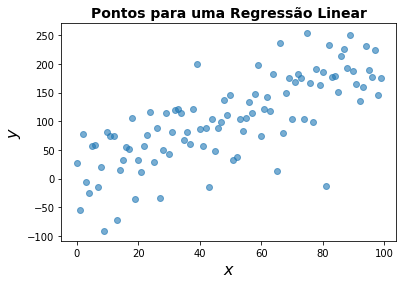

In [ ]:
plt.scatter(x,y1,alpha=0.6)
plt.title('Pontos para uma Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

In [ ]:
# A diagonal da matriz contém a covariância entre cada variável e ela mesma
b = np.cov(x,y1)[1,0] / np.var(x); print(b)
a = np.mean(y1) - b*np.mean(x); print(a)

1.9850551363966769
5.495384904636339


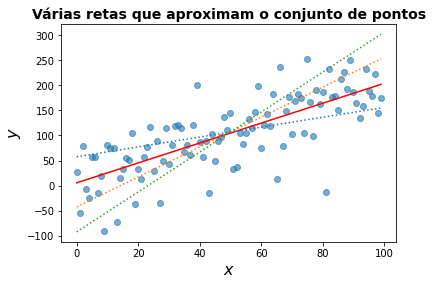

In [ ]:
# you can skip this code!

y2 = a + b*x
y3 = (y2[51] - 50*(b-1))+(b-1)*x
y4 = (y2[51] - 50*(b+1))+(b+1)*x
y5 = (y2[51] - 50*(b+2))+(b+2)*x

plt.scatter(x, y1, alpha=0.6)
plt.plot(x, y2, 'r')
plt.plot(x, y3, linestyle='dotted')
plt.plot(x, y4, linestyle='dotted')
plt.plot(x, y5, linestyle='dotted')

plt.title('Várias retas que aproximam o conjunto de pontos', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.show()

Dado um conjunto de pontos podemos traçar várias retas que *aproximam* de diferentes modos o conjunto de pontos. A regressão linear simples é definida pela reta que minimiza o erro ou a distância dos pontos $y$ dos valores estimados $\hat{y}$. 

De modo geral, dado um conjunto de pontos $(x_i,y_i), i=0,...,n$ queremos buscar a reta $\hat(y) = a + b x$ que reduz o erro das estimativas de $y$. Esse erro pode ser medido pela distância dos pontos $y$ e $\hat{y}$, ou mais simplesmente pela distância quadrática, e podemos escrever esse erro em função de $a$ e $b$, que ainda não conhecemos os valores:

$$ E(a,b) = \sum_{i=1}^{n}(y_i - a - b x_i)^2 $$

O ponto de mínimo (valores $a$ e $b$ dos coeficientes da reta) da função de Erro $E(a,b)$ pode ser então obtido a partir das derivadas.

$$ \partial E / \partial a =  -2 \sum_{i=1}^{n}(y_i - a - b x_i) = 0$$

$$ \partial E / \partial b =  -2 \sum_{i=1}^{n}x_i(y_i - a - b x_i) = 0 $$

Resolvendo-se esse sistema de equações você obtêm:

$$ a = \bar{y} - b \bar{x} $$
onde $\bar{y}$ e $\bar{x}$ são a média dos valores $y_i$ e $x_i$, e:

$$ b = \frac{ \sum_{i=1}^{n} (x_i - \bar{x}) (y_i - \bar{y})}{\sum_{i=1}^{n} (x_i - \bar{x})^2 } $$

Os valores dessa expressão não devem ser estranhos a você. De fato  eles são a $cov(x,y)$ e a $var(x)$ e, desse modo, podemos escrever simplesmente:


$$ b = \frac{cov(x,y)}{var(x)}  $$ 

<br>

$$ a = \bar{y} - b \bar{x} $$

Empregando o conjunto de pontos acima podemos verificar os coeficientes produzidos: 


In [ ]:
# A diagonal da matriz contém a covariância entre cada variável e ela mesma
b = np.cov(x,y1)[1,0] / np.var(x); print(b)
a = np.mean(y1) - b*np.mean(x); print(a)

1.9850551363966769
5.495384904636339


E, assim, determinamos a reta que melhor estima os valores de $y$:

$$ \hat{y} = a + bx = 1.98 + 5.49 x $$

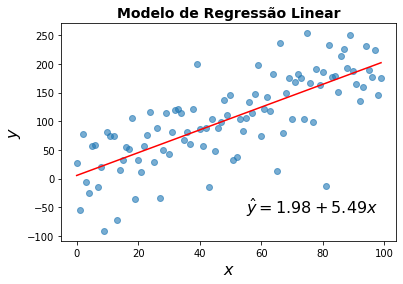

In [ ]:
# you can skip this code!

plt.scatter(x, y1, alpha=0.6)
plt.plot(x, y2, 'r')

plt.title('Modelo de Regressão Linear', fontsize=14, weight='bold')
plt.xlabel('$x$', fontsize=16)
plt.ylabel('$y$', fontsize=16)
plt.text(55,-60,'$ \hat{y} = 1.98 + 5.49 x $', fontsize=16)
plt.show()

# Regressão Linear Múltipla

Um modelo linear mais geral aproxima o valor de variável objetivo, ou dependente, $y$ por uma combinação linear de um conjunto de variáveis preditoras, ou dependentes, $X$. 

$$  \widehat y = a_0 + a_{1} x_{1} + a_{2} x_{2} + ... + a_{n} x_{n} $$ 
 
A cada variável preditora corresponde um coeficiente $a_n$, havendo um coeficiente independente que corresponte ao valor de $\widehat y$ para $x_i=0$ (*intercept*). 

Os coeficientes $a_n$ são obtidos do mesmo modo que na regressão simples, minimizando-se o erro  os valores reais de $y$ do conjunto de dados e os valores estimados $\widehat y$, e podemos escrever:

$$ \min_{a_i}\sum (y_i - \widehat y_i )^2 = $$ 

$$ \min_{a_i} \sum (y_i - (a_0 + a_{1} x_{1} + ... + a_{n} x_{n}) )^2 $$ 

E podemos obter os valores de $a_i$ para o ponto de mínimo aplicando algum método de otimização, como método de mínimos quadrados, e sendo uma função convexa garante-se a existência de um único ponto de mínimo.








# Avaliando o Modelo: Coeficiente de Determinação, $R^2$ 

No caso de uma única variável o cálculo dos pontos de mínimo pode ser obtido diretamente e não é necessário aplicarmos qualquer método de otimização. Como você viu, podemos calcular diretamente os coeficientes $a$ e $b$ apenas empregando os valores médios de $x$ e $y$, a $cov(x,y)$ e a $var(x)$. Assim, para quaisquer conjunto de dados podemos *sempre* calcular um modelo de regressão *mesmo que o modelo linear não represente exatamente os dados*.  Isso é ilustrado pelo exemplo a seguir.


In [ ]:
# you can skip this code!

x = np.arange(-10,10,1)
ruido = norm.rvs(loc=0, scale=1, size=len(x), random_state=1234)
df = pd.DataFrame({'dataset':'I','x':x,'y': 2*x + 3 + ruido})
df = pd.concat( [df, pd.DataFrame({'dataset':'II','x':x,'y': 2*x**2 + 3 + ruido}) ])
df = pd.concat( [df, pd.DataFrame({'dataset':'III','x':x,'y': x**3 - 2*x + ruido}) ])
df = pd.concat( [df, pd.DataFrame({'dataset':'IV','x':x,'y': np.exp(1)**x + ruido}) ])

In [ ]:
df

,dataset,x,y
0,I,-10,-16.528565
1,I,-9,-16.190976
2,I,-8,-11.567293
3,I,-7,-11.312652
4,I,-6,-9.720589
...,...,...,...
15,IV,5,148.415277
16,IV,6,403.834247
17,IV,7,1096.922250
18,IV,8,2982.279145


Modelo de Regressão, Dataset: I  
1.991 x + 2.984
Modelo de Regressão, Dataset: II  
-2.009 x + 68.98
Modelo de Regressão, Dataset: III  
58.39 x - 19.82
Modelo de Regressão, Dataset: IV  
171.9 x + 726.9


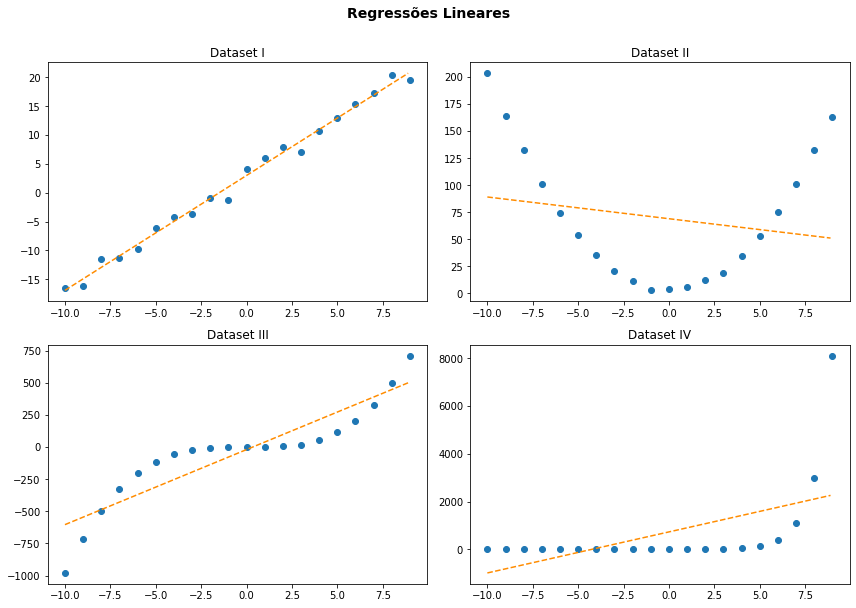

In [ ]:
# you can skip this code!

fig, ax = plt.subplots(2,2,figsize=(12,8))

fig.suptitle('Regressões Lineares', fontsize=14, weight='bold', y=1.05)

i = 0
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)
  print('Modelo de Regressão, Dataset:', ds_type, p)

  ax[i//2,i%2].scatter(ds.x,ds.y)

  x = np.arange(ds.x.min(), ds.x.max(), 0.1)
  ax[i//2,i%2].plot(x,p(x),color='darkorange', linestyle='dashed')

  ax[i//2,i%2].set_title('Dataset ' + ds_type)

  i += 1

plt.tight_layout()
plt.show()

Os quatro conjuntos de dados acima foram obtidos aplicando-se as funções: 

$$ (I) \space \space  \space \space \hat{y} = 2x + 3 + \epsilon $$ 
$$ (II) \space \space  \space \space \hat{y} = 2x^2 + 3 + \epsilon $$
$$ (III) \space \space  \space \space \hat{y}  =  x^3 - 2x + \epsilon$$
$$ (IV) \space \space  \space \space \hat{y}  = x cos(x) + x +  \epsilon $$

acrescidas de uma parcela de erro $\epsilon$. Embora apenas o conjunto de dados $I$ se ajuste de fato a um modelo linear você pôde calcular o modelo linear de todos os conjuntos, *mesmo ele não se ajustando aos dados*.

Neste caso você pode observar o ajuste pela simples inspeção visual, mas o caso será pior nos casos de regressão múltipla em que você não pode observar graficamente o ajuste dos dados ao modelo. É neste ponto que é útil termos uma métrica para avaliarmos o quanto os dados se ajustam ao modelo proposto, uma vez que sempre poderemos obtê-lo. A métrica mais importante para isso é *coeficiente de determinação* ou $R^2$.

O Coeficiente de Determinação, ou ainda $R-$Square, é uma medida de $[0,1]$ que indica o quanto um modelo linear explica a variância de um conjunto de dados. Quanto mais próximo de $1$ o valor do $R^2$, mais os dados se ajustam ao  modelo linear. 

$$ R^2 = 1 - \frac{E_{res}}{E_{total}} $$


onde 

$$E_{res} = \sum (y_i - \widehat y_i )^2 $$  é a *soma dos quadrados residuais* e,

$$E_{total} = \sum (y_i - \bar y )^2 $$ 


é a *soma total dos quadrados*.




De fato, como você pode observar, somente o primeiro conjunto de dados tem um coeficiente de determinação próximo de 1.

In [ ]:
# you can skip this code!

R2 = {}
for ds_type in df.dataset.unique():
  ds = df[df.dataset == ds_type]

  z = np.polyfit(ds.x, ds.y, 1)
  p = np.poly1d(z)

  R2[ds_type] = 1 - sum((ds.y - p(ds.x))**2) / sum((ds.y - np.mean(y))**2)
 
for dataset, r2 in R2.items():
  print('Dataset ' + dataset + ', R-Square = ' + str(np.round(r2,4)))
  

Dataset I, R-Square = 0.9999
Dataset II, R-Square = 0.2481
Dataset III, R-Square = 0.85
Dataset IV, R-Square = 0.3463


Basicamente o coeficiente de determinação é um medida de proporção que verifica o quanto variância dos dados está representada no modelo com relação ao modelo trivial $y = \bar{x}$.


<br>
<br>
<br>
<img src="https://upload.wikimedia.org/wikipedia/commons/8/86/Coefficient_of_Determination.svg"  width=500, align="center">
<br>
<br>
<br>

<small>
<b>
Figura 1. À esquerda, em vermelho, as variâncias com relação ao modelo trivial e, à direita, as variâncias do modelo de regressão (em azul). <br></b>(Fonte: Wikipedia)

> O $R^2$ é útil não só avaliarmos a adequação de um modelo aos dados, mas pode ser também empregado para compararmos diferentes modelos entre si. Por exemplo, você pode ter dois modelos de regressão múltipla para obter o preço de imóveis. Um considera um atributo adicional *bairro  do imóvel*, outro não. O coeficiente então pode ser empregado para avaliar qual o melhor modelo. Você encontra esse uso de métricas de avaliação dos modelos para quaisquer modelos supervisionados e elas são empregadas para a seleção de diferentes modelos ou para ajustes de parâmetros de um mesmo modelo.

# $R^2$ Ajustado

O $R^2$ Ajustado é uma medida alternativa para avaliação do modelo.
A inclusão de inúmeras variáveis, mesmo com pouco poder explicativo sobre a variável dependente, podem sempre aumentar o valor de $R^2$. Isto incentiva a inclusão indiscriminada de variáveis, prejudicando o princípio da parcimônia (princípio da *navalha de Ockhan*) em que o aumento de complexidade não leva a um ganho correspondente do modelo. Para evitar isso você pode então empregar o coeficiente de determinação ajustado que penaliza a inclusão de preditores pouco explicativos:  

$${\displaystyle {\bar {R^{2}}}=1-{\frac {n-1}{n-(k+1)}}\left(1-R^{2}\right),}
 $$

$k+1 $ representa o número de variáveis explicativas mais a constante, e a inclusão de variáveis pouco explicativas passa a penalizar o valor do $R^2$ com o valor ajustado para baixo.

# Modelos de Regressão em Python

Você vai aprender agora como obter modelos de regressão simples e múltipla empregando o pacote `statsmodels` do Python. Vamos começar com uma regressão simples de valores aleatórios apenas para você se familiarizar com a construção do modelo. 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.formula.api as sm


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Vamos gerar uma amostra de 50 valores "aleatórios" a partir de uma função linear.    

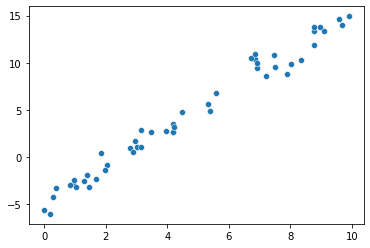

,x,y
0,4.170220,2.653267
1,7.203245,8.561284
2,0.001144,-5.668959
3,3.023326,1.033987
4,1.467559,-3.182193


In [ ]:
rng = np.random.RandomState(1)
x = 10 * rng.rand(50)
y = 2 * x - 5 + rng.randn(50)
sns.scatterplot(x=x, y=y)
plt.show()

df = pd.DataFrame({'x':x,'y':y})
df.head()

## Construindo o modelo linear, `sm.ols(formula = , data= )`

A função `sm.ols()` requer um conjunto de dados e o parâmetro `formula` (*patsy* fórmula, um formato bastante empregado em modelos) indicará as variáveis objetivo e preditoras a serem empregadas.

````
                                                              formula = 'y ~ x' 
````
significa

$$ y \leftarrow  x $$

para um modelo

$$ \widehat y = a_0 + a_1 x $$



In [ ]:
model = sm.ols(formula='y ~ x', data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.979
Method:                 Least Squares   F-statistic:                     2246.
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           5.71e-42
Time:                        17:22:55   Log-Likelihood:                -65.935
No. Observations:                  50   AIC:                             135.9
Df Residuals:                      48   BIC:                             139.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -4.9986      0.239    -20.948      0.0

Observando os coeficientes no sumário do modelo acima vemos que o modelo de aproximação linear é dado por:

$$ y = -4.9986 + 2.0272 x $$

E podemos empregar o modelo para estimar   valores de $y$, isto é $\bar y$ (`predicted`), e  comparar seus valores. 


In [ ]:
df['predicted'] = result.predict(df.x)

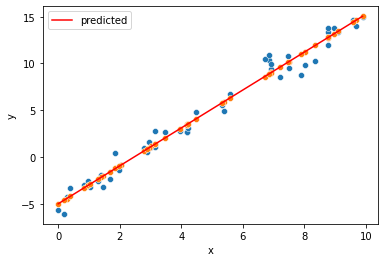

In [ ]:
sns.scatterplot(x='x',y='y',data=df)
sns.scatterplot(x='x',y='predicted',data=df)
sns.lineplot(x='x',y='predicted',data=df,color='red', label='predicted')
plt.legend()
plt.show()

## Analisando o modelo obtido

Observando o Coeficiente de Determinação e os *p-values* dos coeficientes, 

$$ R^2 = 0.979 $$
$$ p-values < 0.05 $$

Podemos ver que $ y = -4.9986 + 2.0272 x $ é um modelo que aproxima bastante bem os dados.



# CASO: Estimando o Preço de Veículos

Vamos empregar agora um conjunto de dados mais interessante e estimar o Preço de veículos com base em suas características. Vamos empregar o seguinte conjunto de dados:

In [ ]:
df = pd.read_csv("https://vincentarelbundock.github.io/Rdatasets/csv/MASS/Cars93.csv",index_col=0)
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


## Preparação dos Dados

A preparação de dados na maior parte dos casos difere caso a caso, mas um princípio geral é de que precisamos preparar o dado da melhor forma para sejam aplicados os modelos. 

Neste caso a api `statsmodels.formula.api` não suporta atributos nomeados com '.' e precisamos, então, adequar o nomde dos atributos antes de aplicar o modelo.

In [ ]:
df.columns = [ x.replace('.','') for x in df.columns ]

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [ ]:
df.describe(include='all')

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make
count,93,93,93,93.000000,93.000000,93.000000,93.000000,93.000000,93,93,93,93.000000,93.000000,93.000000,93.000000,93,93.000000,93.000000,93.000000,93.000000,93.000000,93.000000,91.000000,82.000000,93.000000,93,93
unique,32,93,6,NaN,NaN,NaN,NaN,NaN,3,3,6,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,93
top,Ford,Spirit,Midsize,NaN,NaN,NaN,NaN,NaN,Driver only,Front,4,NaN,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,USA,Chevrolet Corvette
freq,8,1,22,NaN,NaN,NaN,NaN,NaN,43,67,49,NaN,NaN,NaN,NaN,61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,48,1
mean,NaN,NaN,NaN,17.125806,19.509677,21.898925,22.365591,29.086022,NaN,NaN,NaN,2.667742,143.827957,5280.645161,2332.204301,NaN,16.664516,5.086022,183.204301,103.946237,69.376344,38.956989,27.829670,13.890244,3072.903226,NaN,NaN
std,NaN,NaN,NaN,8.746029,9.659430,11.030457,5.619812,5.331726,NaN,NaN,NaN,1.037363,52.374410,596.731690,496.506525,NaN,3.279370,1.038979,14.602382,6.819674,3.778986,3.223265,2.989072,2.997967,589.896510,NaN,NaN
min,NaN,NaN,NaN,6.700000,7.400000,7.900000,15.000000,20.000000,NaN,NaN,NaN,1.000000,55.000000,3800.000000,1320.000000,NaN,9.200000,2.000000,141.000000,90.000000,60.000000,32.000000,19.000000,6.000000,1695.000000,NaN,NaN
25%,NaN,NaN,NaN,10.800000,12.200000,14.700000,18.000000,26.000000,NaN,NaN,NaN,1.800000,103.000000,4800.000000,1985.000000,NaN,14.500000,4.000000,174.000000,98.000000,67.000000,37.000000,26.000000,12.000000,2620.000000,NaN,NaN
50%,NaN,NaN,NaN,14.700000,17.700000,19.600000,21.000000,28.000000,NaN,NaN,NaN,2.400000,140.000000,5200.000000,2340.000000,NaN,16.400000,5.000000,183.000000,103.000000,69.000000,39.000000,27.500000,14.000000,3040.000000,NaN,NaN
75%,NaN,NaN,NaN,20.300000,23.300000,25.300000,25.000000,31.000000,NaN,NaN,NaN,3.300000,170.000000,5750.000000,2565.000000,NaN,18.800000,6.000000,192.000000,110.000000,72.000000,41.000000,30.000000,15.000000,3525.000000,NaN,NaN


## Regressão Linear Simples

Inicialmente vamos empregar somente variáveis numéricas para estimar o Preço, `Price`, dos veículos começando por um modelo de regressão linear simples empregando apenas a potência do motor, `Horsepower`, como variável preditora.

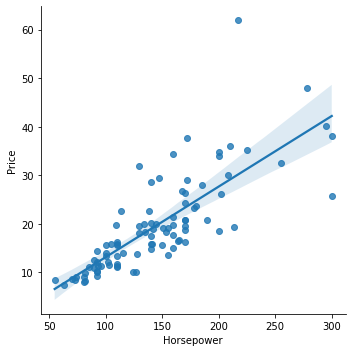

In [ ]:
sns.lmplot(x='Horsepower',y='Price',data=df)
plt.show()

Vamos, portanto, tentar inicialmente determinar o preço a partir somente da potência dos veículos, isto é:

$$ \hat{Price} =  a_0 + a_1 \text{Horsepower} $$



In [ ]:
model = sm.ols(formula="Price ~ Horsepower", data=df)


In [ ]:
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           6.84e-21
Time:                        17:22:57   Log-Likelihood:                -297.23
No. Observations:                  93   AIC:                             598.5
Df Residuals:                      91   BIC:                             603.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3988      1.820     -0.769      0.4

Obtemos assim o modelo:

$$ \hat{Price} =  -1.3988 + 0.1454 \times \text{Horsepower} $$   
 



## Predição de novos valores, `predict(x)`

Podemos agora empregar nosso modelo para estimar o consumo desconhecido de um novo veículo na cidade mas que sabemos o seu peso:  

In [ ]:
x = pd.DataFrame({'Horsepower': [150,180]})
result.predict(x)

0    20.406915
1    24.768052
dtype: float64

## Avaliando o Modelo

### Inspeção Visual

Sendo uma regressão simples podemos fazer uma inspeção visual do modelo e ver se de fato os dados se ajustam ao modelo.

In [ ]:
df['predicted'] = result.predict()

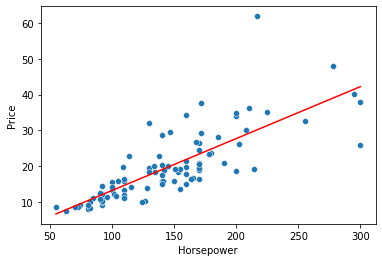

In [ ]:
sns.scatterplot(x='Horsepower', y='Price', data=df)
sns.lineplot(x='Horsepower', y='predicted', data=df, color='red')
plt.show()


Os dados parecem se ajustar muito parcialmente aos dados. Mas a inspeção visual é bastante limitada e, no máximo, pode permitir a avaliação de modelos de regressão simples, em duas dimensões.

### Analisando o $R^2$ e *p-values*

$$ R^2 = 0.621$$
$$ p-values = 0.444 > 0.05 \text{, para o intercept}$$

A análise do coeficiente de determinação e do *p-value* dos coeficientes é uma forma mais efetiva de avaliação e pode ser aplicada também a modelos de regressão múltipla (com mais de uma variável preditora). O valores também mostram que os dados se ajustam de modo bastante parcial ao modelo, que explica somente 62.1% da variação dos dados havendo ainda um coeficiente (*intercept*) não significativo para o modelo. O intervalo de confiança seria ainda uma verificação adicional e fornece o intervalo de valores de cada coeficiente, e que podemos empregar para identificar possíveis desvios nos coeficientes. 

In [ ]:
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.621
Model:                            OLS   Adj. R-squared:                  0.617
Method:                 Least Squares   F-statistic:                     149.3
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           6.84e-21
Time:                        17:22:57   Log-Likelihood:                -297.23
No. Observations:                  93   AIC:                             598.5
Df Residuals:                      91   BIC:                             603.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.3988      1.820     -0.769      0.4

## Regressão Múltipla: Adicionando Mais Variáveis ao Modelo

Sendo o ajuste do modelo anterior parcial vamos buscar aprimorar o mdeolo adicionando mais variáveis preditoras. Vamos, entretanto, ainda nos atermos a entradas numéricas no modelo.

In [ ]:
model = sm.ols(formula="Price ~ Passengers +	Length +	Wheelbase	+ \
              Width	+ Turncircle + Luggageroom + \
              Weight + Horsepower + EngineSize + \
              RPM + Wheelbase ", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.689
Method:                 Least Squares   F-statistic:                     18.94
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           2.32e-16
Time:                        17:22:57   Log-Likelihood:                -251.04
No. Observations:                  82   AIC:                             524.1
Df Residuals:                      71   BIC:                             550.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      53.1792     28.749      1.850      

A inspeção visal agora não é mais possível mas podemos analisar as métricas do modelo. O modelo agora apresenta um resultado melhor, mas ainda assim parcial. 

$$ \bar{R}^2 = 0.689 $$
$$ p-values > 0.05 $$

O $\bar{R}^2$, ajustado, ainda é bastante inferior a $0.8$ (um valor a partir do qual as predições começam a ficar interessantes) e ainda existem estimadores não sigficantes, incluindo o `intercept`. Um modelo melhor pode ser obtido, então, empregando-se somente os estimadores relevante, e empregamos o $-1$ na fórmula para excluir o `intercept` do modelo. 

In [ ]:
model = sm.ols(formula="Price ~ Wheelbase	+ Width	+ Horsepower - 1", data=df)
result = model.fit()
print(result.summary())

                                 OLS Regression Results                                
Dep. Variable:                  Price   R-squared (uncentered):                   0.941
Model:                            OLS   Adj. R-squared (uncentered):              0.939
Method:                 Least Squares   F-statistic:                              476.8
Date:                Sat, 20 Nov 2021   Prob (F-statistic):                    4.19e-55
Time:                        17:22:57   Log-Likelihood:                         -286.90
No. Observations:                  93   AIC:                                      579.8
Df Residuals:                      90   BIC:                                      587.4
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Conseguimos agora um modelo que parece suficientemente bom e que explica mais de 93% da variação dos preços dos veículos. 

$$ \bar{R}^2 = 0.939 $$
$$ p-values < 0.05 $$

Este é assim o modelo que deveríamos empregar e podemos fazer agora uma predição mais segura do preço dos veículos com base nessas características. Por exemplo, podemos estimar o preço de um veículo hipotético com as medidas médias de `Wheelbase`,`Width` e `Horsepower`. 

In [ ]:
x = pd.DataFrame({'Wheelbase': [ df.Wheelbase.mean() ],
                  'Width': [ df.Width.mean() ],
                  'Horsepower': [ df.Horsepower.mean() ]})
result.predict(x)

0    19.48232
dtype: float64

# Adicionando Variáveis Categóricas

O pacote `statsmodel` permite empregar variáveis categóricas diretamente. Como o cálculo dos coeficientes requer atributos numéricos o pacote transforma esses atributos internamente fazendo o *hot encode* dos dados. 

In [ ]:
model = sm.ols(formula="Price ~ Origin + Wheelbase + Width	+ Horsepower - 1", data=df)
result = model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.710
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     53.85
Date:                Sat, 20 Nov 2021   Prob (F-statistic):           7.17e-23
Time:                        17:22:57   Log-Likelihood:                -284.82
No. Observations:                  93   AIC:                             579.6
Df Residuals:                      88   BIC:                             592.3
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Origin[USA]        -0.2091     14.536     

Por exemplo, ao incluir o atributo categórico `Origin`, que possui valores `USA` e `non-USA`, o pacote cria as variáveis binárias (*hot encode*) `Origin[USA]` e `Origin[non-USA]` para serem empregadas no modelo. Aqui o modelo apresentou um resultado pior que o modelo anterior, mas seu  objetivo aqui é apenas de mostrar o uso de atributos categóricos em um modelo de regressão.

O uso de variáveis categóricas é muito importante em várias aplicações de modelos de regressão e você pode, por exemplo, pensar na importância de um atributo categórico como *bairro* ou *marca* para a estimativa de preços de imóveis ou veículos.

# Modelo de Regressão o Aprendizado Supervisionado

O modelo de Regressão Linear que você aprendeu aqio já carrega os elementos essenciais de qualquer Aprendizado de Máquina Supervisionado e, por isso, vale a pena revisarmos o que aprendeu até aqui.

1. **Conjunto de Treinamento**. O conjunto de dados $(X,y)$ corresponde ao conjunto de treinamento em que os dados são  rotulados com valores $y_i$ para cada conjunto de dados $X_i$.

1. **Aprendizado**. O aprendizado consiste e obter os coeficientes do modelo linear que minimizam o erro entre os valores do conjunto de treinamento e os valores obtidos pelo modelo. A otimização de uma função de custo é um conceito chave no aprendizado de máquina e você poderá encontrar essa mesma ideia até em modelos sofisticados de redes neurais profundas para o ajuste dos *pesos* e o aprendizado da rede.

1. **Busca de um Padrão**. A regressão linear produz um padrão que aproxima o conjunto de dados e a partir do qual podemos fazer inferências úteis (reveja aqui a definição de Ciência de Dados da trilha anterior!)

1. **Avaliação do Modelo**. Outro conceito chave está em definirmos uma métrica para avaliação do modelo (aqui, o coeficiente de determinação $R^2$). Outros modelos empregarão outras métricas, mas a ideia é a mesma, uma métrica que avalia o quanto o modelo de fato representa o padrão dos dados. Isso é útil para compararmos modelos concorrentes, como por exemplo, no caso da regressão, dois modelos de regressão que empregam diferentes variáveis preditoras.  



# Regressão Logística 

Antes de começarmos a falar de Regressão Logística um ponto de atenção: você não deve confundir modelos de regressão em geral, lineares ou não, que preveem valores com a Regressão Logística que é um modelo de Classificação. A Regressão Logística  modela as probabilidades para problemas de classificação binários, com dois resultados possíveis, como *yes/no*, *true/false*, *fraude/não fraude*, *spam/não spam* ou *0/1*, e pode ser entendido como uma extensão dos modelos de regressão linear para problemas de classificação.

O modelo de regressão linear pode funcionar bem para regressão, mas falha na maior parte dos casos quando é aplicado para classificação. Imagine, você poderia rotular uma das classes com 0 e a outra com 1 e usar a regressão linear. Tecnicamente isso funciona e certamente você obterá os coeficientes da regressão linear, afinal para quaisquer conjuntos de pontos $(X, y)$ podemos calcular os coeficientes de um modelo linear. Mas para classificação essa abordagem apresenta muitos problemas. Como seu resultado não é uma probabilidade, mas a interpolação linear dos pontos, não há um limite significativo no qual você possa distinguir uma classe da outra. 

Um modelo simples pode mostrar a ineficiência da regressão linear para a classificação. Veja a abaixo o uso de regressão linear para a classificação dos pontos verdes e vermelhos abaixo.

In [ ]:
%load_ext rpy2.ipython

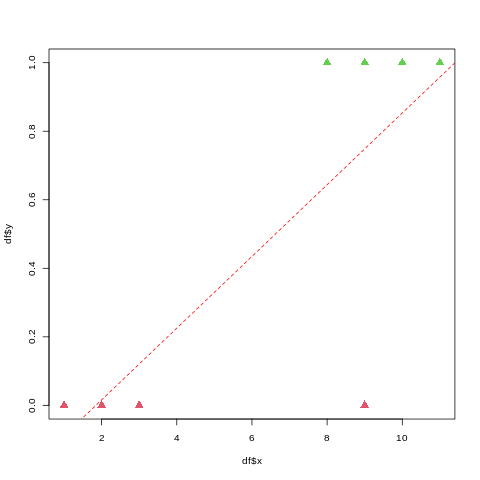

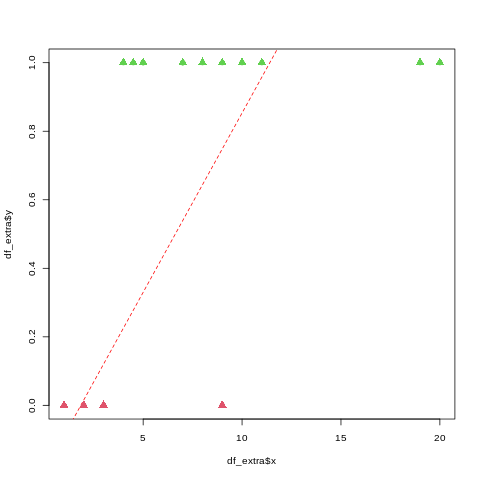

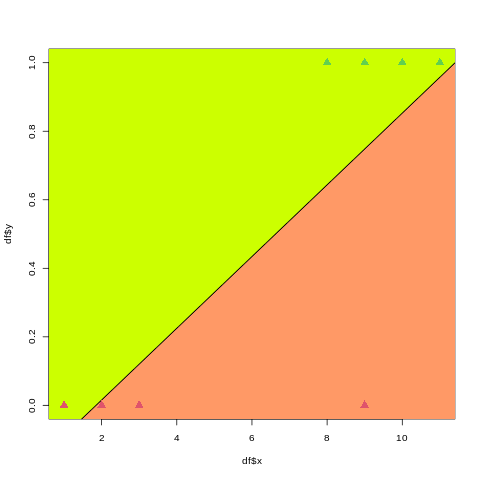

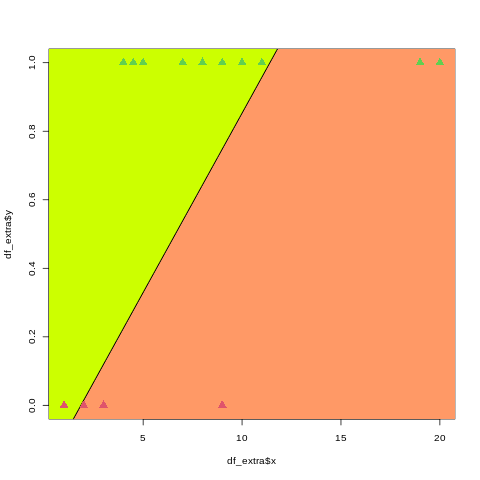

In [ ]:
# you can skip this code!

%%R
# adaptado de https://christophm.github.io/interpretable-ml-book/logistic.html
# e https://stats.stackexchange.com/questions/22381/why-not-approach-classification-through-regression

df = data.frame(x = c(1,2,3,8,9,10,11,9),
  y = c(0,0,0,1,1,1,1, 0))

df_extra  = data.frame(x=c(df$x, 7, 7, 7, 20, 19, 5, 5, 4, 4.5),
  y=c(df$y, 1,1,1,1, 1, 1, 1, 1, 1))

# par(mfrow = c(1, 3))
layout.matrix <- matrix(c(1, 1, 1, 0), nrow = 2, ncol = 2)

layout(mat = layout.matrix,
       heights = c(2, 2), # Heights of the two rows
       widths = c(2, 2)) # Widths of the two columns

plot(df$x, df$y, col=df$y+2, pch=17)
fit = lm(y ~ x,data=df)
abline(coefficients(fit),col='red',lty=2)
points(df$x, df$y, col=df$y+2, pch=17, cex=1.5)

plot(df_extra$x, df_extra$y, col=df_extra$y+2)
fit = lm(y ~ x,data=df)
abline(coefficients(fit),col='red',lty=2)
points(df_extra$x, df_extra$y, col=df_extra$y+2, pch=17, cex=1.5)

plot(df$x, df$y, col=df$y+2, pch=17)
fit = lm(y ~ x,data=df)
abline(coefficients(fit),col='red',lty=2)
polygon(c(0,12,12),c(predict(fit,data.frame(x = c(0,12))),-0.1), col='#FF9966')
polygon(c(0,12,0), c(predict(fit,data.frame(x = c(0,12))),1.1), col='#CCFF00')
points(df$x, df$y, col=df$y+2, pch=17, cex=1.5)

plot(df_extra$x, df_extra$y, col=df_extra$y+2)
fit = lm(y ~ x,data=df)
abline(coefficients(fit),col='red',lty=2)
polygon(c(0,21,21),c(predict(fit,data.frame(x = c(0,21))),-0.1), col='#FF9966')
polygon(c(0,21,0), c(predict(fit,data.frame(x = c(0,21))),1.1), col='#CCFF00')
points(df_extra$x, df_extra$y, col=df_extra$y+2, pch=17, cex=1.5)


O primeiro conjunto de pontos é linearmente separável e a regressão linear permite classificar os dados com apenas um erro de classificação (o ponto vermelho de menor valor $x$). Mas à medida que inserirmos novos dados, o modelo passa a apresentar  falhas cada vez maiores. 


## Modelo logístico

Para resolver esse problema, a regressão logística modela o que é conhecido como log de probabilidades:

$$ log( \frac{p}{1-p}) = a_0 + a_1 x_1 + ... + a_n x_n $$

Os resultados da regressão logística vão então informar sobre as chances ('Odds') e razão das chances ('Odds Ratio') e não exatamente probabilidades (por exemplo, em alguns casos os valores podem não ter soma 1), mas podemos entender de qualquer modo que uma *chance* reflete em uma probabilidade maior daquele evento ocorrer. Se um evento tem probabilidade $p$, suas chances são $p / (1-p)$, e é por isso que a esquerda lado é chamado de "odds logarítmicas" ou "logit", e podemos obter a 
probabilidade de chances invertendo a função acima:

$$ p = 1 / (1 + e^{- ( a_0 + a_1 x_1 + ... + a_n x_n ) })$$

Essa função é conhecida como  função logística ou sigmóide, $\sigma$, é definida como:


$$\sigma(x)=\frac{1}{1+e^{-x}}$$


Ela tem o seguinte gráfico:



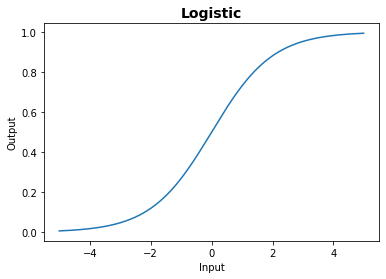

In [ ]:
x = np.arange(-5, 5, 0.01)
y = 1 / (1 + np.exp(-x))

plt.plot(x,y)
plt.title('Logistic', fontsize=14, weight='bold')
plt.xlabel('Input')
plt.ylabel('Output')

plt.show()

e desempenha um papel importante em outros modelos, como os modelos neurais. Note que os valores dessa função variam de 0 a 1 e é portanto, possível empregar essa função como uma medida de probabilidade, ou das chances. 

Esse procedimento funciona muito melhor para classificação que a regressão linear e podemos usar 0.5 como o valor limite de probabilidades entre as classes, isto é, valores $p < 0.5$ para uma classe e valores $p \ge 0.5$ para outra. 

## Estimando os parâmetros

Estimar os valores dos coeficientes $a_0, a_1, ...$. pode seguir a mesma estratégia empregada para calcular os coeficientes de uma regressão múltipla e empregamos um otimizador, como o método de mínimos quadrados.

Do mesmo modo que na regressão linear você deseja minimizar o erro ou maximizar os *acertos* do modelo. Para cada amostra que  pertence à classe '1', você irá querer que $p$ fique mais próximo de $1$ enquanto, para cada amostra que não  pertence à classe '1', você quer que $p$ seja o mais próximo de $0$ possível. As diferenças consistem no erro que queremos minimizar e podemos então, a partir de valores iniciais de dos coeficientes $a_0, a_1, ...$ empregar um método de otimização como o de mínimos quadrados, ou um método gradiente, para obter  os coeficientes que fornecem o menor erro. 




## Exemplo

Você pode pensar em um sistema de detecção de fraude de transações de cartão de crédito com base no histórico de ocorrências. Valores da operação e uso do cartão nas últimas 24h são duas variáveis conhecidas como preditoras de fraude de cartões. Para isso, depois de estimados os coeficientes $a_0, a_1, a_2$ com base nas amostras conhecidas, tanto de operações de fraude como de operações normais de crédito, você pode aplicar dados de uma nova operação `(Valor,Trans24h)` no modelo logístico para estimar a chance da operação ser ou não uma fraude: 

$$ P(\text{Fraude} | \text{Valor, Trans24h}) = \frac{1}{ (1 + e^{- ( a_0 + a_1 \text{Valor} + a_2 \text{Trans24h} ) })}$$



 

## Probabilidades e Classificação Binária

O modelo de regressão logística não é apenas um modelo de classificação, mas também fornece as *chances* de cada valor. Esta é uma grande vantagem em relação a modelos que fornecem apenas a classificação final, pois faz uma grande diferença saber se a *chance*  daquela classe é 99% ou 51%. Para usar o nosso exemplo, pense  em uma transação de cartão classificada como fraude, ser uma fraude com 99% de chance parece algo bem mais crítico que uma fraude com 51% de chance! 

A regressão logística ainda é um modelo de **classificação binária**. Mas ele pode ser estendido para classificação multiclasse. O procedimento é simples e consiste em criarmos vários classificadores. Se você tem 3 classes, 'Y', 'N', 'O', pode então ter um classificador logístico 'Y' e 'não Y', outro 'N' e 'não Y', ainda 'O' e 'não O' e, do mesmo modo, buscar o maior valor de p entre esses classificadores. Em geral os pacotes de Software fazem uma implementação multiclasse da classificação logística e, portanto, fica transparente para você a regressão logística ser um procedimento de classificação binária. 

> Um cuidado a ser tomado no uso da regressão logística é que ela pode *sofrer de separação completa*. Isso ocorre quando uma variável preditora separa perfeitamente as duas classes e, neste caso, o modelo de regressão logística não pode ser treinado pois o coeficiente desse atributo seria infinito e convergiria. Observar isso é importante, mas em termos práticos você não precisaria de um modelo se tivesse uma regra simples, como uma única variável para separar as duas classes, e existem técnicas de penalização dos pesos ou definição de uma distribuição de probabilidade dos pesos para minimizar esse problema.

# CASO: Estimando o tipo de Transmissão dos Veículos

Você vai empregar agora o mesmo conjunto de dados anterior para prever a classe de transmissão dos veículos, isto é, se os veículos tem ou não transmissão manual. Para isso vamos empregar aqui o pacote `scikit-learn`, um pacote que será empregado para muitos outros modelos de aprendizado de máquina.

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make,predicted
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,18.953203
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,27.675476
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,23.605082
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,23.605082
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,28.838446


In [ ]:
df.Mantransavail.value_counts()

Yes    61
No     32
Name: Mantransavail, dtype: int64

## Preparação dos Dados

`Mantransavail` é um atributo binário e portanto podemos aplicar a regressão logística para obter um modelo de classificação. Mas para a regressão logística com o `scikit-lean` precisamos ter os valores de classe como $0$ ou $1$, e vamos medir a probabilidade do valor se *verdadeiro*, isto é, $1$. Vamos, portanto, criar um novo atributo  em que o valor $1$ vai designar os veículos manuais e $0$ os veículos de transmissão exclusivamente automática.

In [ ]:
df['Manual'] = df['Mantransavail'].apply(lambda x: 1 if 'Yes' in x else 0)

In [ ]:
df.head()

,Manufacturer,Model,Type,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make,predicted,Manual
1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,18.953203,1
2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,27.675476,1
3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,23.605082,1
4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,23.605082,1
5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,28.838446,1


In [ ]:
df.Manual.value_counts()

1    61
0    32
Name: Manual, dtype: int64

Vamos então definir algumas variáveis independentes e a variável dependente do treinamento, lembrando que você deve empregar variáveis numéricas no modelo logístico.

In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'Type', 'MinPrice', 'Price', 'MaxPrice',
       'MPGcity', 'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders',
       'EngineSize', 'Horsepower', 'RPM', 'Revpermile', 'Mantransavail',
       'Fueltankcapacity', 'Passengers', 'Length', 'Wheelbase', 'Width',
       'Turncircle', 'Rearseatroom', 'Luggageroom', 'Weight', 'Origin', 'Make',
       'predicted', 'Manual'],
      dtype='object')

In [ ]:
X_train = df[['EngineSize', 'Horsepower', 'RPM', 'Price', 'Weight']]
y_train = df['Manual']


In [ ]:
from sklearn.linear_model import LogisticRegression  # para configurar o modelo.. 

# criando o modelo
logreg = LogisticRegression()

# treinando o modelo
logreg.fit(X_train,y_train)



LogisticRegression()

O treinamento do modelo fornece então os seguintes coeficientes:

In [ ]:
logreg.coef_

array([[-0.84623734,  0.00713032,  0.00141883, -0.01854519, -0.00161397]])

## Avaliando o Modelo

Existem muitas métricas e formas de avaliação e você vai estudar mais sobre isso adiante. Por hora vamos no deter apenas em verificar o número de *acertos* do nosso preditor.

In [ ]:
y_pred = logreg.predict(X_train)

df['Manual_predict'] = y_pred

df[['Manual','Manual_predict']]

,Manual,Manual_predict
1,1,1
2,1,1
3,1,1
4,1,1
5,1,1
...,...,...
89,1,0
90,1,1
91,1,1
92,1,1


Podemos fazer isso como acima, fazendo a predição dos valores do nosso conjunto e comparando com os valores *reais*, e você pode ainda obter o percentual de acertos do modelo:

In [ ]:
sum( df['Manual'] == df['Manual_predict'] ) / len(df)

0.8279569892473119

Nada mal, não é mesmo? Esse é o *score* do modelo ou a acuracidade, o percentual de acertos do nosso modelo, e pode ser também obtido como: 

In [ ]:
logreg.score(X_train, y_train)

0.8279569892473119

## Empregando Atributos Categóricos

Do mesmo modo que na regressão linear pode haver preditores categóricos importantes que queremos incluir no nosso modelo. O `scikit-learn`, entretanto, não fornece um *hot encode* implícito dos atributos categóricos como no pacote *statsmodels*. Você precisará, portanto, fazer isso de modo explícito.

### Preparando os Dados

Vamos incluir aqui o atributo `Type` que, esperamos, tenha alguma influência sobre o tipo de transmissão disponível nos veículos. Precisamos, desse modo, fazer o *hot encode* desse atributo.

In [ ]:
df.Type.value_counts()

Midsize    22
Small      21
Compact    16
Sporty     14
Large      11
Van         9
Name: Type, dtype: int64

In [ ]:
df = pd.get_dummies(df, columns=['Type'])
df.head()

,Manufacturer,Model,MinPrice,Price,MaxPrice,MPGcity,MPGhighway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Revpermile,Mantransavail,Fueltankcapacity,Passengers,Length,Wheelbase,Width,Turncircle,Rearseatroom,Luggageroom,Weight,Origin,Make,predicted,Manual,Manual_predict,Type_Compact,Type_Large,Type_Midsize,Type_Small,Type_Sporty,Type_Van
1,Acura,Integra,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra,18.953203,1,1,0,0,0,1,0,0
2,Acura,Legend,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend,27.675476,1,1,0,0,1,0,0,0
3,Audi,90,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90,23.605082,1,1,1,0,0,0,0,0
4,Audi,100,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100,23.605082,1,1,0,0,1,0,0,0
5,BMW,535i,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i,28.838446,1,1,0,0,1,0,0,0


In [ ]:
df.columns

Index(['Manufacturer', 'Model', 'MinPrice', 'Price', 'MaxPrice', 'MPGcity',
       'MPGhighway', 'AirBags', 'DriveTrain', 'Cylinders', 'EngineSize',
       'Horsepower', 'RPM', 'Revpermile', 'Mantransavail', 'Fueltankcapacity',
       'Passengers', 'Length', 'Wheelbase', 'Width', 'Turncircle',
       'Rearseatroom', 'Luggageroom', 'Weight', 'Origin', 'Make', 'predicted',
       'Manual', 'Manual_predict', 'Type_Compact', 'Type_Large',
       'Type_Midsize', 'Type_Small', 'Type_Sporty', 'Type_Van'],
      dtype='object')

In [ ]:
X_train = df[['EngineSize', 'Horsepower', 'RPM', 'Price', 'Weight',
              'Type_Compact', 'Type_Large', 'Type_Midsize', 
              'Type_Small', 'Type_Sporty', 'Type_Van']]
y_train = df['Manual']


In [ ]:
from sklearn.linear_model import LogisticRegression  # para configurar o modelo.. 

# criando o modelo
logreg = LogisticRegression(max_iter=1000) # aumentamos o número de iterações para obter a convergência do modelo

# treinando o modelo
logreg.fit(X_train,y_train)



LogisticRegression(max_iter=1000)

Agora você já sabe como obter a acuracidade (o *score*) do modelo diretamente, e podemos fazer:

In [ ]:
logreg.score(X_train, y_train)

0.8602150537634409

Um aumento considerável no percentual de acerto do nosso modelo! Essa é métrica de acuracidade é bom resultado e um bom começo para você entender as métricas de um modelo de classificação, mas é uma medida extremamente simples e mesmo modelos ruins podem ter um acuracidade alta em alguns casos. Outras métricas e formas de avaliação mais elaboradas em modelos de classificação serão vistas mais adiante.

# Síntese

Nesta trilha aprendeu alguns princípios comuns e importantes dos modelos de Aprendizado Supervisionado como conjunto de treinamento, variáveis preditoras e objetivo e métricas de avaliação dos modelos. Você deve ter compreendido também a diferença de solução de problemas regressão, que estimam valores, e de classificação, que fazem predição de categorias dos dados. De qualquer modo, ambos são modelos supervisionados onde os casos de treinamento são previamente rotulados com as saídas (variável objetivo) através da qual construímos o modelo para a predição de novos casos. 

Você também aprendeu a criar modelos de Regressão Linear Simples e Múltipla e de Regressão Logística em Python, empregando os pacotes `statsmodels` e `scikit-learn`.O `scikit-learn` é um pacote que implementa a maior parte dos modelos que empregaremos à seguir e você mais aprender ainda muito mais sobre ele. 




# Para Saber Mais

* Modelos de regressão linear podem ser associados a transformações, como por exemplo a aplicação de $log()$, e podemos aplicar um modelo para aproxima $ Log(y) = a_0 + a_1 x_1 + a_2 x_2 + ...$ no lugar $y$. Isso expande a capacidade do modelo linear e é útil em uma série de problemas práticos como cálculo de preços de imóveis e aluguéis por exemplo. Pesquise sobre isso ou tente reproduzir o modelo de preços de veículos criado aqui obtendo um modelo de $Log(Price)$. 

* Vamos relembrar o que é o *Hot Encode*? Acesse: https://www.educative.io/blog/one-hot-encoding e veja também como fazer o *hot encode* com o `Pandas` ou ainda com `scikit-learn`.

* Entenda melhor por que modelo de regressão linear não são adequados para classificação, acesse Molnar Christoph, **Interpretable Machine Learning: 
A Guide for Making Black Box Models Explainable** em: https://christophm.github.io/interpretable-ml-book/ cap. 5.2 Logistic Regression.

* Aprenda mais sobre a criação de modelos com o pacote `scikit-learn` em **An introduction to machine learning with scikit-learn** Disponível em: https://scikit-learn.org/stable/tutorial/basic/tutorial.html. Ou você ainda pode preferir acessar Jake VanderPlas. **Python Data Science Handbook**  Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/,  no capítulo *Introducing SciKit-Learn*, https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html.

# Referências


Molnar Christoph, **Interpretable Machine Learning: 
A Guide for Making Black Box Models Explainable** Disponível em: https://christophm.github.io/interpretable-ml-book/ Acesso em: 06 de Novembro de 2021.

Kotu, Vijay; Deshpande, Balachandre **Data Science: concepts and practice**. 2nd ed. Cambridge, [England]: Morgan Kaufmann, c2019. E-book (570 p.) ISBN 9780128147627 (electronic bk.). Disponível em: http://pergamum.mackenzie.br:8080/pergamumweb/vinculos/00003c/00003cef.jpg.

Oliveira, Rogério de. **Probabilidade e Estatística Aplicada com R** Disponível em: https://github.com/Rogerio-mack/Probabilidade-Estatistica-Aplicada-R Acesso em: 06 de Novembro de 2021.

Manapat, Michael. **Introduction to Machine Learning with Python**. Em An Introduction to Machine Learning. EMag Edição 50 (Abr 2017)

Navarro, Danielle, **Learning Statistics with R** disponível em: https://learningstatisticswithr.com/book/ Acesso: 06 de Novembro de 2021.

Jake VanderPlas. **Python Data Science Handbook**  O'Reilly Media, Inc. (2016). ISBN: 9781491912058. Disponível em: https://jakevdp.github.io/PythonDataScienceHandbook/. Acesso: 06 de Novembro de 2021.

Larose, Chantal D.; Larose, Daniel T. **Data Science Using Python and R** Hoboken: Wiley, c2019. E-book (259 p.) (Wiley Series on Methods and Applications in Data Mining Ser.). ISBN 9781119526834 (electronic bk.). Disponível em: https://www3.mackenzie.br/biblioteca_virtual/index.php?tipoBiblio=ebookcentral&flashObg=n

___. **An introduction to machine learning with scikit-learn** Disponível em: https://scikit-learn.org/stable/tutorial/basic/tutorial.html Acesso em: 06 de Novembro de 2021.

___. **scikit-learn: machine learning in Python** Disponível em: http://scipy-lectures.org/packages/scikit-learn/index.html Acesso em: 06 de Novembro de 2021.